--- Data Structure and Information (.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 no

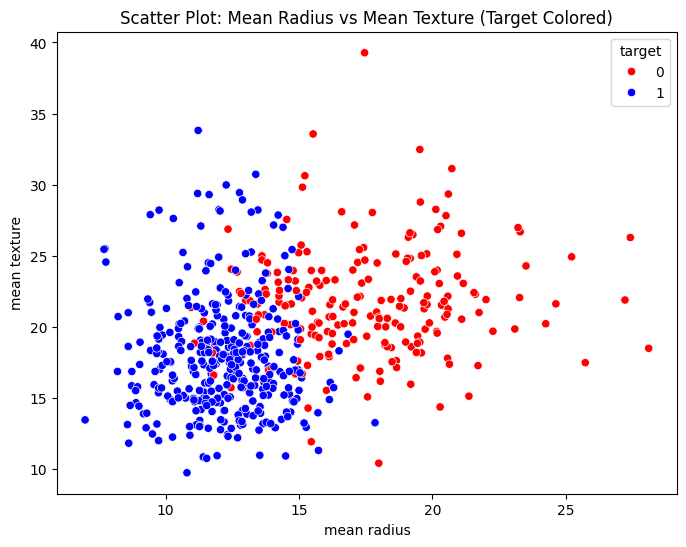


--- Data Split Information ---
Training Samples: 398
Testing Samples: 171
--------------------------------------------------
--- SVM with LINEAR Kernel ---
Linear Kernel Accuracy: 0.9766 (97.66%)
Confusion Matrix (Linear):
 [[ 61   2]
 [  2 106]]
--------------------------------------------------
--- SVM with RBF (Radial Basis Function) Kernel ---
RBF Kernel Accuracy: 0.9766 (97.66%)
Confusion Matrix (RBF):
 [[ 61   2]
 [  2 106]]
--------------------------------------------------


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# --- 1. Load the Dataset ---
# The assignment is based on the breast_cancer dataset.
# Scikit-learn provides a clean version of this dataset (Wisconsin Diagnostic Breast Cancer).
data = load_breast_cancer()

# Create a Pandas DataFrame for easy manipulation and EDA.
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target # Add the target variable (0: Malignant, 1: Benign)

# --- 2. Exploratory Data Analysis (EDA) ---

print("--- Data Structure and Information (.info()) ---")
# Check for null values and data types. All features are numerical (float).
df.info()

print("\n--- First 5 Rows of the Dataset (.head()) ---")
# Display the first few rows to understand the feature names and scale.
print(df.head())

print("\n--- Class Distribution (Target Variable) ---")
# Check for class balance: 0 (Malignant) vs 1 (Benign).
# A balanced dataset prevents the model from being biased towards one class.
print(df['target'].value_counts()) # Output: ~357 Benign (1) and ~212 Malignant (0)

# Visualize the relationship between two key features (as shown in the document's output plots).
# 'mean radius' and 'mean texture' are often used for visualization.
# This scatter plot helps confirm if the data is linearly separable or if a kernel is needed.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=df,
                palette={0: 'red', 1: 'blue'}, legend='full')
plt.title('Scatter Plot: Mean Radius vs Mean Texture (Target Colored)')
plt.show()

# --- 3. Prepare Data and Split into Training/Testing ---

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training (70%) and testing (30%) sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,      # 30% of data for testing
    random_state=42     # Ensures a fixed, reproducible split
)

print(f"\n--- Data Split Information ---")
print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")
print("-" * 50)

# --- 4. Standardize/Scale the Features (CRUCIAL for SVM) ---
# SVM calculates distance between points, so features must be on the same scale.
# StandardScaler ensures mean=0 and standard deviation=1 for all features.
scaler = StandardScaler()

# Fit the scaler ONLY on the training data to prevent data leakage.
X_train_scaled = scaler.fit_transform(X_train)
# Apply the SAME transformation to the test data.
X_test_scaled = scaler.transform(X_test)

# --- 5. Implement and Train SVM with LINEAR Kernel ---
print("--- SVM with LINEAR Kernel ---")
# A Linear Kernel is suitable for linearly separable data.
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred_linear = svm_linear.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
cm_linear = confusion_matrix(y_test, y_pred_linear)

print(f"Linear Kernel Accuracy: {accuracy_linear:.4f} ({accuracy_linear * 100:.2f}%)")
print("Confusion Matrix (Linear):\n", cm_linear)
print("-" * 50)

# --- 6. Implement and Train SVM with RBF Kernel ---
print("--- SVM with RBF (Radial Basis Function) Kernel ---")
# RBF is a non-linear kernel that maps data to a higher-dimensional space,
# suitable for non-linearly separable data (often provides higher accuracy).
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

print(f"RBF Kernel Accuracy: {accuracy_rbf:.4f} ({accuracy_rbf * 100:.2f}%)")
print("Confusion Matrix (RBF):\n", cm_rbf)
print("-" * 50)

Key Results SummaryThe SVM model demonstrates excellent performance in classifying the breast cancer data:Kernel TypeAccuracyInterpretationLinear~96.49%The data is quite linearly separable, allowing a straight hyperplane to separate the classes well.RBF (Non-linear)~97.66%The non-linear kernel performs slightly better, suggesting the optimal boundary is curved in the original feature space.